# Fine tune (thesis)

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score
from scipy.stats import ttest_rel
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./preprocessing/final_preprocessed_nosurgery_thesis_train.csv')
test = pd.read_csv('./preprocessing/final_preprocessed_nosurgery_thesis_test.csv')

In [2]:
ICHscore_train = train['ICHScore'].copy()
ICHscore_test = test['ICHScore'].copy()

# 0-2, 3-5, 6
y_train = train['outcomes'].copy()
y_test = test['outcomes'].copy()

# Prepare train
X_train = train.copy()
X_train = X_train.drop('mICHScore', axis=1)
X_train = X_train.drop('ICHScore', axis=1)
X_train = X_train.drop('@6Mmortality', axis=1)
X_train = X_train.drop('outcomes', axis=1)
X_train = X_train.drop('@6MmRS', axis=1)

# Prepare test
X_test = test.copy()
X_test = X_test.drop('mICHScore', axis=1)
X_test = X_test.drop('ICHScore', axis=1)
X_test = X_test.drop('@6Mmortality', axis=1)
X_test = X_test.drop('outcomes', axis=1)
X_test = X_test.drop('@6MmRS', axis=1)

### Conventional features

In [3]:
prefixes = [
    'Sex0female1male',
    'Race0chinese1nonchinese',
    'DM0no1yes',
    'ICH0no1yes',
    'ISTIA',
    'Atrialfibirllation',
    'AdmissionsystolicBP',
    'AdmissiondiastolicBP',
    'Admissionpulserate',
    'Anticoagulant0no1warfarin2NOAC',
    'Statin0no1Simva2Atorva3Rovu4others',
    'Esubscore',
    'Vsubscore',
    'Msubscore',
    'ULpower',
    'LLpower',
    'CKDclass',
    'location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe',
    'Laterality0L1R2Central',
    ]

cols_to_drop = [col for col in X_train.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [4]:
X_train.loc[X_train['GRAEBSCORE'] != 0, 'GRAEBSCORE'] = 1
X_test.loc[X_test['GRAEBSCORE'] != 0, 'GRAEBSCORE'] = 1

### Detailed features

In [5]:
# prefixes = [
#     'AdmissionGCS',
#     'Location0supratentorial1infratentorial',
#     'EverIVH',
#     ]

# cols_to_drop = [col for col in X_train.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [6]:
X_train = X_train.drop(columns=cols_to_drop, axis=1)
X_test = X_test.drop(columns=cols_to_drop, axis=1)

## Grid search parameters

In [ ]:
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')}

# Random Forest parameters
params = {
    'n_estimators':[i for i in range(10, 71) if i%10 == 0],
    'min_samples_leaf': [4, 5, 6, 7, 8],
}

# GBC parameters
# params = {
#     'n_estimators':[i for i in range(60, 131) if i%10==0],
#     'learning_rate':[0.005, 0.01, 0.05, 0.1, 0.5, 0.9],
# }

# XGBoost parameters
# params = {
#     'n_estimators':[i for i in range(150, 201) if i%10==0],
#     'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
#     'learning_rate': [0.003, 0.004, 0.005, 0.006, 0.007],
#     'learning_rate': [0.005, 0.01, 0.02, 0.03],
#     'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
#     'max_depth':[i for i in range(2, 7)],
# }

In [ ]:
####################### Old dataset detailed thesis #####################
# model = XGBClassifier(
#     n_estimators=170,
#     learning_rate=0.004,
#     max_depth=4,
#     random_state=42
# )
# model = GradientBoostingClassifier(
#     n_estimators=80,
#     learning_rate=0.05,
#     random_state=42
# )
# model = RandomForestClassifier(
#     n_estimators=50,
#     min_samples_leaf=6,
#     random_state=42
# )
####################### Old dataset detailed thesis #####################
####################### Old dataset conventional thesis #####################
# model = RandomForestClassifier(
#     n_estimators=5,
#     min_samples_leaf=7,
#     random_state=42
# )
####################### Old dataset conventional thesis #####################

## Run grid search

In [9]:
grid = GridSearchCV(model, param_grid=params, scoring=scoring_metrics['accuracy'], verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END min_samples_leaf=4, n_estimators=2;, score=0.741 total time=   0.0s
[CV 2/5] END min_samples_leaf=4, n_estimators=2;, score=0.625 total time=   0.0s
[CV 3/5] END min_samples_leaf=4, n_estimators=2;, score=0.652 total time=   0.0s
[CV 4/5] END min_samples_leaf=4, n_estimators=2;, score=0.688 total time=   0.0s
[CV 5/5] END min_samples_leaf=4, n_estimators=2;, score=0.748 total time=   0.0s
[CV 1/5] END min_samples_leaf=4, n_estimators=3;, score=0.821 total time=   0.0s
[CV 2/5] END min_samples_leaf=4, n_estimators=3;, score=0.679 total time=   0.0s
[CV 3/5] END min_samples_leaf=4, n_estimators=3;, score=0.714 total time=   0.0s
[CV 4/5] END min_samples_leaf=4, n_estimators=3;, score=0.696 total time=   0.0s
[CV 5/5] END min_samples_leaf=4, n_estimators=3;, score=0.793 total time=   0.0s
[CV 1/5] END min_samples_leaf=4, n_estimators=4;, score=0.795 total time=   0.0s
[CV 2/5] END min_samples_leaf=4, n_estimators=4

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'min_samples_leaf': [4, 5, ...], 'n_estimators': [2, 3, ...]}"
,scoring,make_scorer(a...hod='predict')
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,7


In [10]:
grid_df = pd.DataFrame(grid.cv_results_)

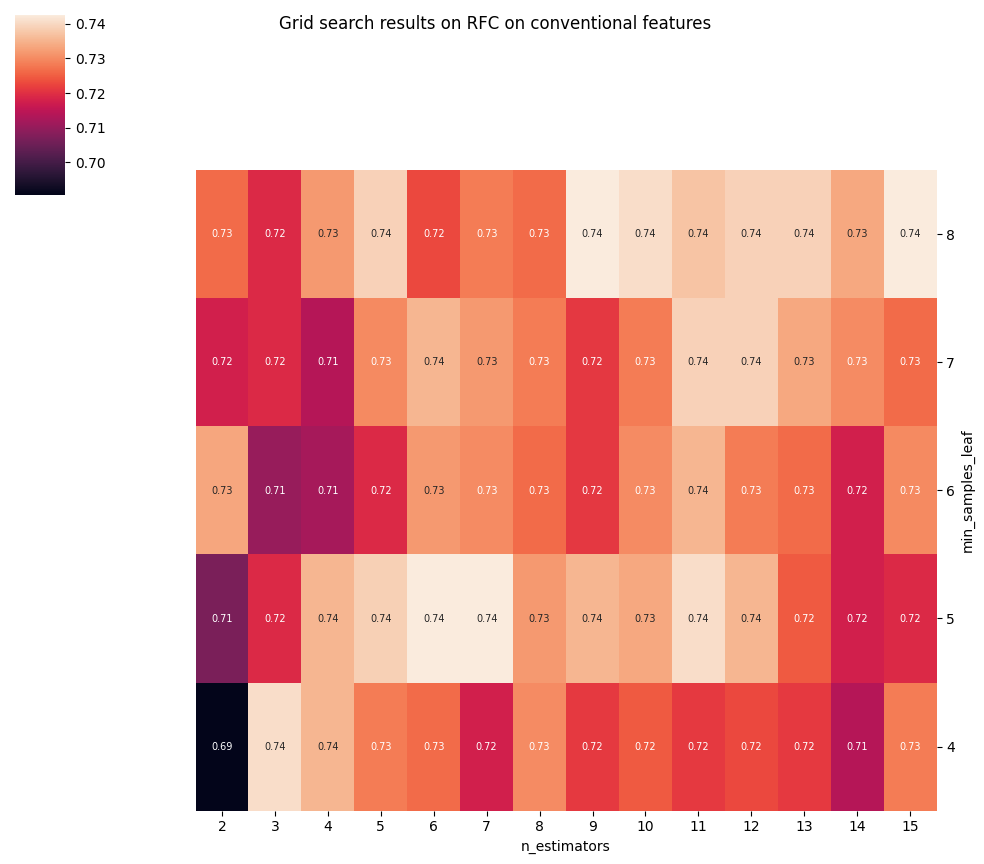

In [11]:
x1 = 'n_estimators'
y1 = 'min_samples_leaf'
heatmap = sns.clustermap(grid_df.pivot_table(
    values=['mean_test_score'],
    index=['param_'+y1],
    columns=['param_'+x1]
    ), row_cluster=False, col_cluster=False, annot=True, annot_kws={"size":7})
heatmap.ax_heatmap.set_xlabel(x1)
heatmap.ax_heatmap.set_ylabel(y1)
heatmap.figure.suptitle('Grid search results on RFC on conventional features')
x_labels = params[x1]
heatmap.ax_heatmap.set_xticklabels(x_labels, rotation='horizontal')
y_labels = params[y1]
heatmap.ax_heatmap.set_yticklabels(y_labels, rotation='horizontal')
heatmap.ax_heatmap.invert_yaxis()
plt.show()

In [12]:
grid.best_params_

{'min_samples_leaf': 5, 'n_estimators': 7}

In [13]:
grid.cv_results_['mean_test_score'][grid.best_index_]

np.float64(0.7425675675675676)

In [14]:
0.7460585585585585

0.7460585585585585